# CEO-REQUEST CHALLENGE

## Problem statement

> Should Olist remove underperforming sellers from its marketplace?

To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

Step ① Compute, for each `seller_id`, and cumulated since the beginning:
- The `revenues` it brings
- The `costs` associated with all its bad reviews
- The resulting `profits` (revenues - costs)
- The number of `orders` (it will impact overall IT costs)


Step ② We can then sort sellers by increasing profits for Olist, and for each number of sellers to remove, compute the financial impact it would have made had they never been accepted on the platform. We may find an optimal number of sellers to remove that maximizes Olist's profit margin

In [0]:
# Write down a detailed strategy (step by step) to create the DataFrame you need for step 1
# Think about how to re-use or update the logic you have already coded in your `olist` package

<details>
    <summary>Hints</summary>


Starting from your current `seller().get_training_data()` DataFrame:
- Can you easily transform it to compute Olist's positive `revenue_per_seller`? 
- Can you easily transform it to compute Olist's `cost_of_bad_reviews`?

❓Instead of starting again from scratch, investigate your source code in `seller.py` - how was the mean `review_score` per seller computed? Can you imagine a way to amend your code  to compute `cost_of_reviews` in the same process? 
</details>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [1]:
from olist.seller import Seller
seller = Seller()

In [2]:
sellers = seller.get_training_data()
sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000,167.99,16.799,-83.201


Text(0.5, 0, 'seller id')

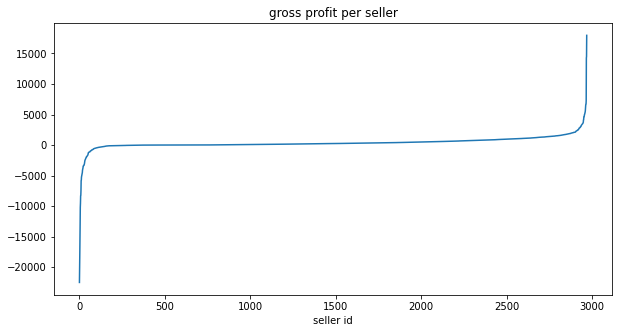

In [5]:
sorted_sellers = sellers.sort_values(by='profits')[['profits', 'n_orders', 'revenues']].reset_index()
sorted_sellers.head()

plt.figure(figsize=(10,5))
sorted_sellers.profits.plot()
plt.title('gross profit per seller')
plt.xlabel('seller id')

## Proposition




+ Remove sellers 
    + As soon as they start selling large quantites but with low profit
    
    + As months go on while profits keep decreasing

In [280]:
under_performing_sellers = sellers[sellers['profits'] < 0]

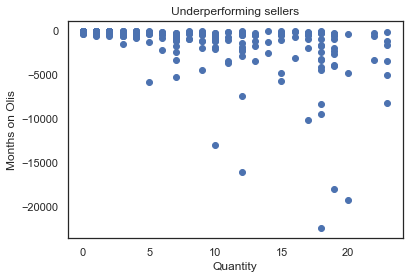

In [278]:
sns.set(style='white')
plt.scatter('months_on_olist','profits', data=under_performing_sellers)
plt.title('Underperforming sellers')
plt.ylabel('Months on Olis')
plt.xlabel('Quantity')
plt.show()

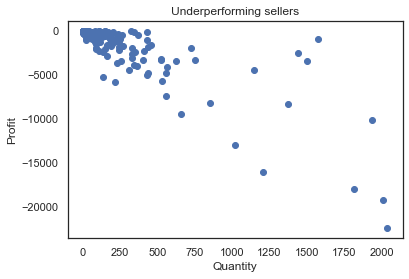

In [277]:
sns.set(style='white')
plt.scatter('quantity','profits', data=under_performing_sellers)
plt.title('Underperforming sellers')
plt.ylabel('Profit')
plt.xlabel('Quantity')
plt.show()

## Analysis

In [284]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [285]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [286]:
sellers.head(3)

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,underperforming
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000,218.70,341.870,201.870,0
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025,11703.07,2290.307,2050.307,0
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.0,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000,158.00,15.800,15.800,1


In [270]:
feature_list = ['months_on_olist',
                'delay_to_carrier',
                'wait_time',
                'quantity']

features = sellers[feature_list].copy()
features['underperforming'] = (sellers['profits'] < 0) *1

features.head(3)

,months_on_olist,delay_to_carrier,wait_time,quantity,underperforming
0,4.0,0.0,13.018588,3,0
1,14.0,0.0,9.065716,41,0
2,0.0,0.0,4.042292,1,0


In [271]:
df = pd.DataFrame()
df["vif_index"] = [vif(features.values, i) for i in range(features.shape[1])]
df["features"] = features.columns
df

,vif_index,features
0,2.211283,months_on_olist
1,1.251985,delay_to_carrier
2,2.343429,wait_time
3,1.442900,quantity
4,1.324873,underperforming


In [272]:
features_standardized = standardize(features, feature_list)
model = smf.logit(formula=f"underperforming ~ {' + '.join(feature_list)}", data=features_standardized).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.323440
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        underperforming   No. Observations:                 2970
Model:                          Logit   Df Residuals:                     2965
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 May 2021   Pseudo R-squ.:                  0.1683
Time:                        16:36:32   Log-Likelihood:                -960.62
converged:                       True   LL-Null:                       -1155.0
Covariance Type:            nonrobust   LLR p-value:                 7.741e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.1297      0.067    -31.793      0.000      -2.261      -1.998
months_on_olist     -1.0165      0.101    -10.043      0.000      -1.215      -0.818
delay_to_carrier     0.0679      0.055      1.238      0.216      -0.040       0.175
wait_time            0.4738      0.065      7.296      0.000       0.347       0.601
quantity             1.6808      0.139     12.049      0.000       1.407       1.954
====================================================================================
"""

In [273]:
model.params.apply(lambda x: np.exp(x))

Intercept           0.118874
months_on_olist     0.361876
delay_to_carrier    1.070247
wait_time           1.606048
quantity            5.369660
dtype: float64

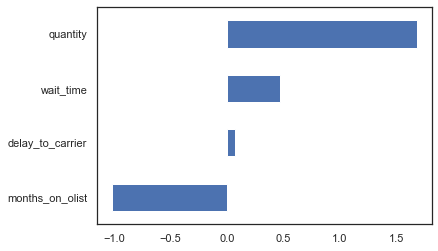

In [274]:
model.params[1:].sort_values().plot(kind='barh');

## Perspectives

In [ ]:
    + Influence of performance threshold on profit
    
    + Influence of distance on profit